In [1]:
%matplotlib inline
import sklearn
import requests as rq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [4]:
train, test = split_train_test(data, 0.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D911F0550>,
      dtype=object)

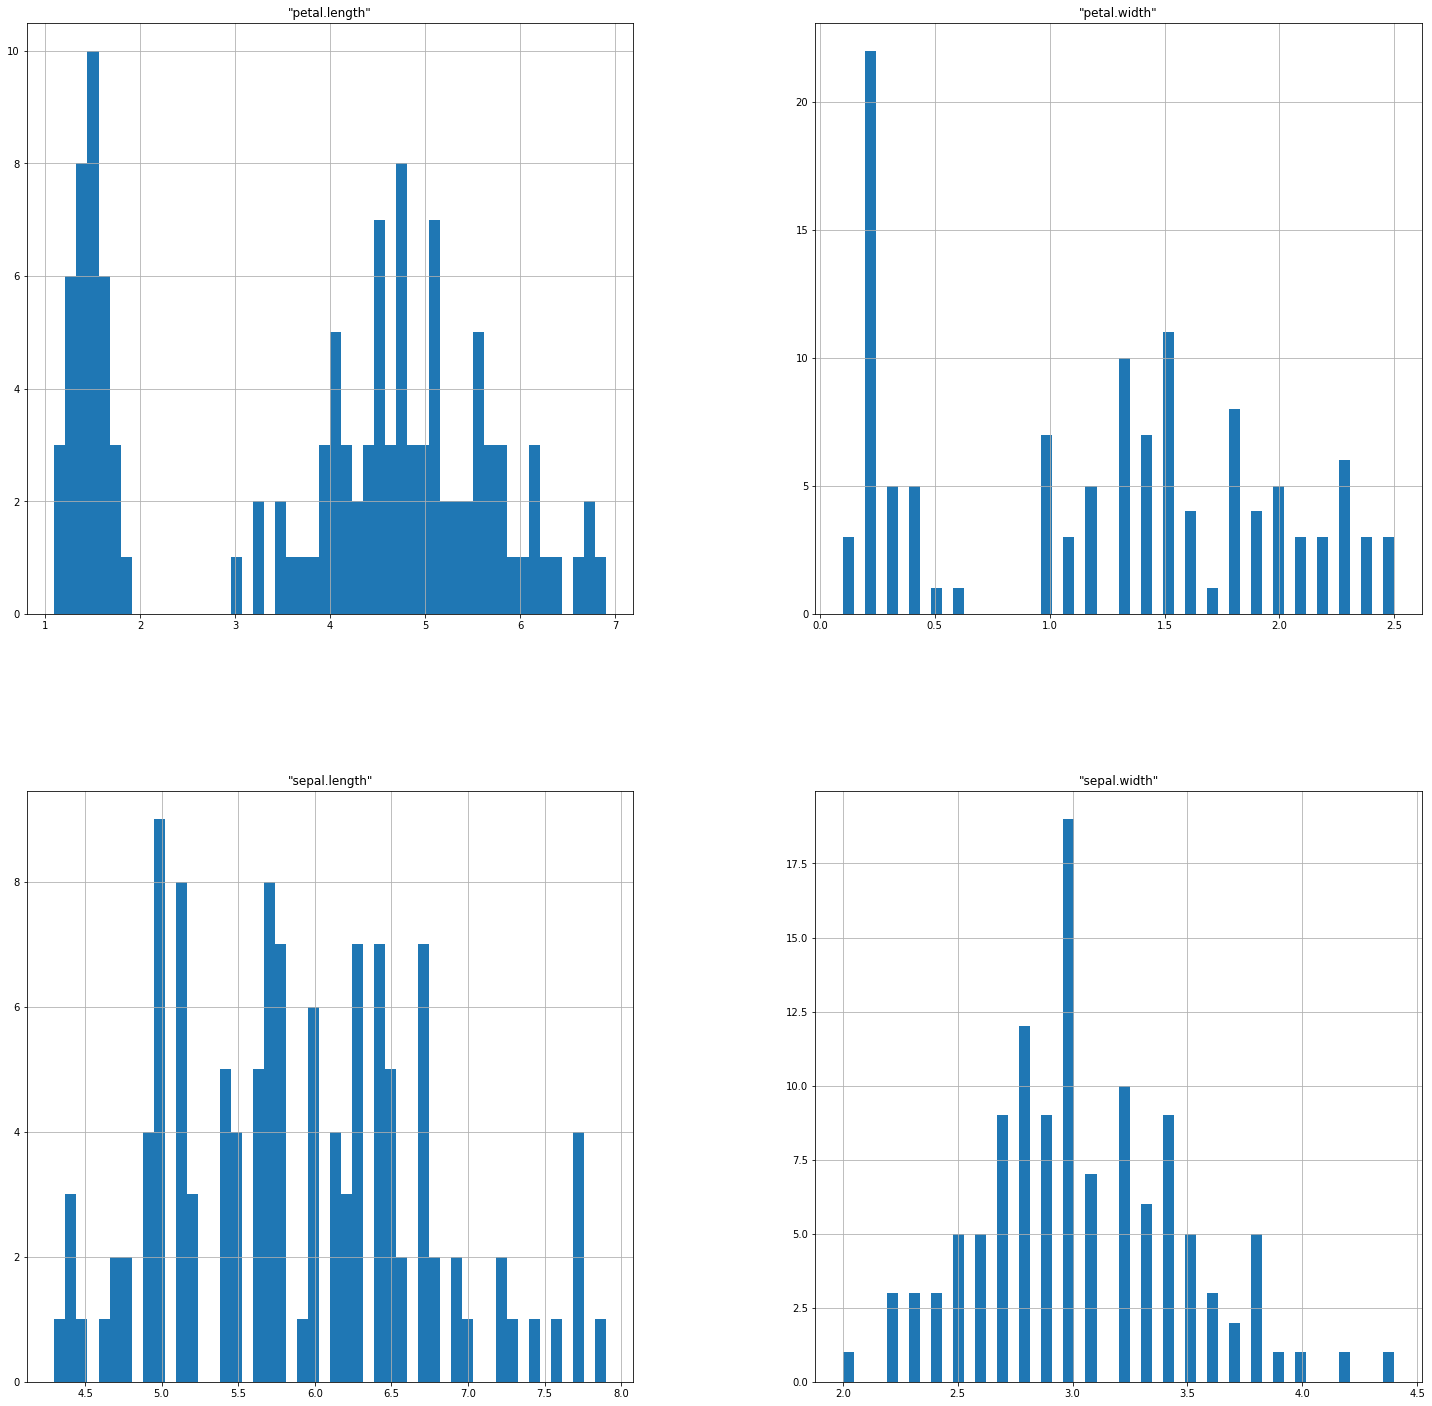

In [5]:
train.hist(bins=50, figsize=(25,25))

In [6]:
train.head()

,"""sepal.length""","""sepal.width""","""petal.length""","""petal.width""","""variety"""
68,6.2,2.2,4.5,1.5,"""Versicolor"""
4,5.0,3.6,1.4,0.2,"""Setosa"""
114,5.8,2.8,5.1,2.4,"""Virginica"""
17,5.1,3.5,1.4,0.3,"""Setosa"""
46,5.1,3.8,1.6,0.2,"""Setosa"""


In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
X = train.iloc[:, 0:4]
y = train.iloc[:, 4]

In [14]:
tree_clf = DecisionTreeClassifier()

In [15]:
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
result = tree_clf.predict(test.iloc[0:11, 0:4])
accuracy = tree_clf.score(test.iloc[:,0:4], test.iloc[:, 4])

In [53]:
pd.DataFrame(result)

,0
0,"""Versicolor"""
1,"""Versicolor"""
2,"""Virginica"""
3,"""Setosa"""
4,"""Setosa"""
5,"""Versicolor"""
6,"""Virginica"""
7,"""Setosa"""
8,"""Virginica"""
9,"""Versicolor"""


In [56]:
accuracy

0.9333333333333333

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
neigh = KNeighborsClassifier() # default k = 5

In [59]:
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [60]:
neigh.score(test.iloc[:, 0:4], test.iloc[:, 4])

0.9333333333333333

In [61]:
neigh.predict(test.iloc[10:11, 0:4])

array(['"Setosa"'], dtype=object)

In [62]:
test.iloc[10:11, 0:5]

,"""sepal.length""","""sepal.width""","""petal.length""","""petal.width""","""variety"""
5,5.4,3.9,1.7,0.4,"""Setosa"""


In [65]:
tree_clf.score(test.iloc[:, 0:4], test.iloc[:, 4])

0.9333333333333333

In [66]:
neigh.n_neighbors = 4 # k = 4

In [67]:
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [68]:
neigh.predict(test.iloc[10:11, 0:4])

array(['"Setosa"'], dtype=object)

In [69]:
neigh.score(test.iloc[:, 0:4], test.iloc[:, 4])

0.9666666666666667